In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load the datasets
df_familia_pessoa = pd.read_csv('bases/df_fam_pessoas_amostra_100mil.csv', sep=',')
df_familia_pessoas_tratado = pd.read_csv('base_pre/df_var_caracterisca_pessoas.csv')
df_familia_pessoas_final = df_familia_pessoa.merge(df_familia_pessoas_tratado, on='id_familia', how='left')
df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [5]:
import numpy as np
df_familia_pessoas_final['ind_parc_mds_fam'] = np.where(df_familia_pessoas_final['ind_parc_mds_fam'] != 0, 1, 0)

In [6]:
df_familia_pessoas_final = df_familia_pessoas_final[['dias_cadastramento', 'dias_atualizacao','cod_familia_indigena_fam',
                                                     'ind_familia_quilombola_fam','qtde_pessoas',
                                                     #'pct_mulheres','pct_homens',
                                                     #'pct_1_infancia','pct_crianca_adolescente','pct_crianca_adulto',
                                                     #'pct_idosos','pct_deficientes',
                                                     'qtd_mulheres','qtd_homens',
                                                     'qtd_1_infancia','qtd_crianca_adolescente','qtd_crianca_adulto',
                                                     'qtd_idosos','qtd_deficientes',
                                                     'tem_mulher','tem_homem',
                                                     'tem_1_infancia','tem_crianca_adolescente','tem_crianca_adulto',
                                                     'tem_idoso','tem_deficiente',
                                                     'ind_parc_mds_fam', 'classe_renda']]

In [7]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final.drop('classe_renda', axis=1)

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (10000, 20)


,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,qtd_mulheres,qtd_homens,qtd_1_infancia,qtd_crianca_adolescente,qtd_crianca_adulto,qtd_idosos,qtd_deficientes,tem_mulher,tem_homem,tem_1_infancia,tem_crianca_adolescente,tem_crianca_adulto,tem_idoso,tem_deficiente,ind_parc_mds_fam
12352,17.0,17,2.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
36645,462.0,420,2.0,2.0,2,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
251404,217.0,217,2.0,1.0,5,2.0,3.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
246227,1428.0,287,2.0,2.0,3,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
198005,4682.0,550,2.0,2.0,4,2.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0


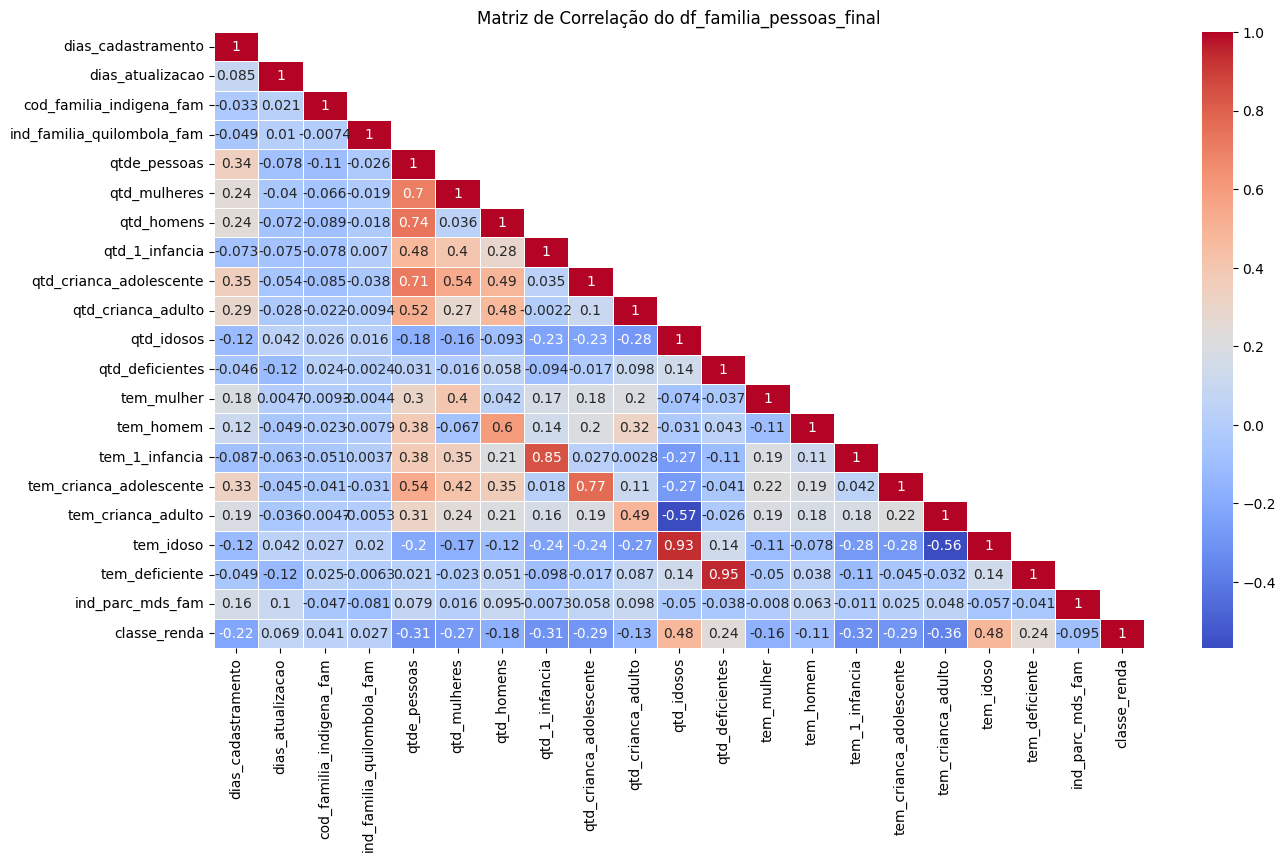

In [8]:
# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotando o gráfico de correlações com a máscara
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação do df_familia_pessoas_final')
plt.show()

In [9]:
X = X.drop(['qtd_idosos', 'qtd_deficientes','qtd_1_infancia'], axis=1)

In [10]:
X.head()

,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,qtd_mulheres,qtd_homens,qtd_crianca_adolescente,qtd_crianca_adulto,tem_mulher,tem_homem,tem_1_infancia,tem_crianca_adolescente,tem_crianca_adulto,tem_idoso,tem_deficiente,ind_parc_mds_fam
12352,17.0,17,2.0,2.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
36645,462.0,420,2.0,2.0,2,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
251404,217.0,217,2.0,1.0,5,2.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
246227,1428.0,287,2.0,2.0,3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
198005,4682.0,550,2.0,2.0,4,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0


In [11]:
y.describe()

,classe_renda
count,10000.000000
mean,0.473800
std,0.702967
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [12]:
y.value_counts()

,count
classe_renda,
0.0,6486
1.0,2290
2.0,1224


In [13]:
y.isnull().sum()

0

In [14]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
y_train.describe()

,classe_renda
count,8000.000000
mean,0.473750
std,0.702939
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [16]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [17]:
y_train_mapped.describe()

,classe_renda
count,8000.000000
mean,0.473750
std,0.702939
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


# Fazendo um pipeline comparando diversos modelos

In [18]:
!pip install xgboost -q

In [19]:
!pip install catboost -q

In [20]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Definição dos Modelos

In [21]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [22]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 3, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [23]:
from sklearn.metrics import accuracy_score, f1_score

In [24]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.60
  Acurácia: 0.73
Modelo: RandomForest
  F1 Score: 0.62
  Acurácia: 0.74
Modelo: XGBoost
  F1 Score: 0.62
  Acurácia: 0.74
Modelo: CatBoost
  F1 Score: 0.62
  Acurácia: 0.74


# 4. Geração de Matriz de Confusão

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

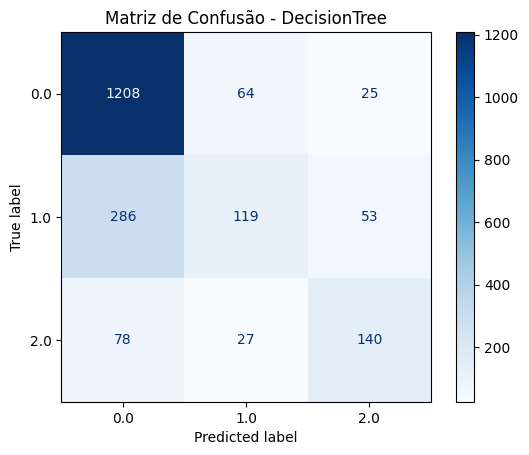

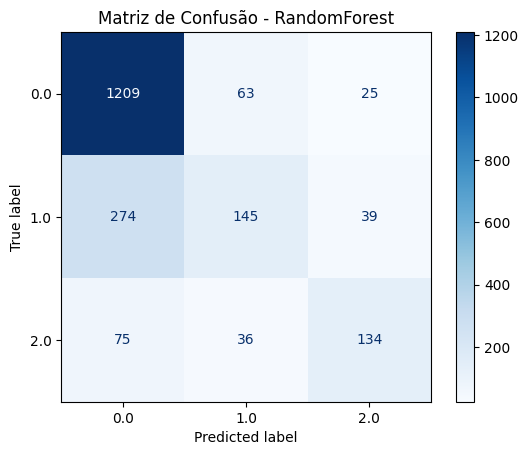

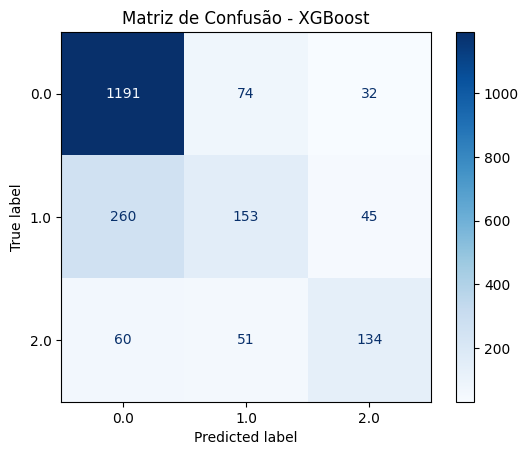

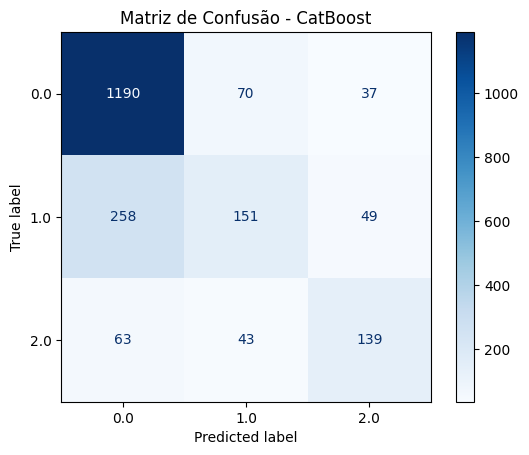

In [26]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [27]:
import numpy as np
from sklearn.inspection import permutation_importance

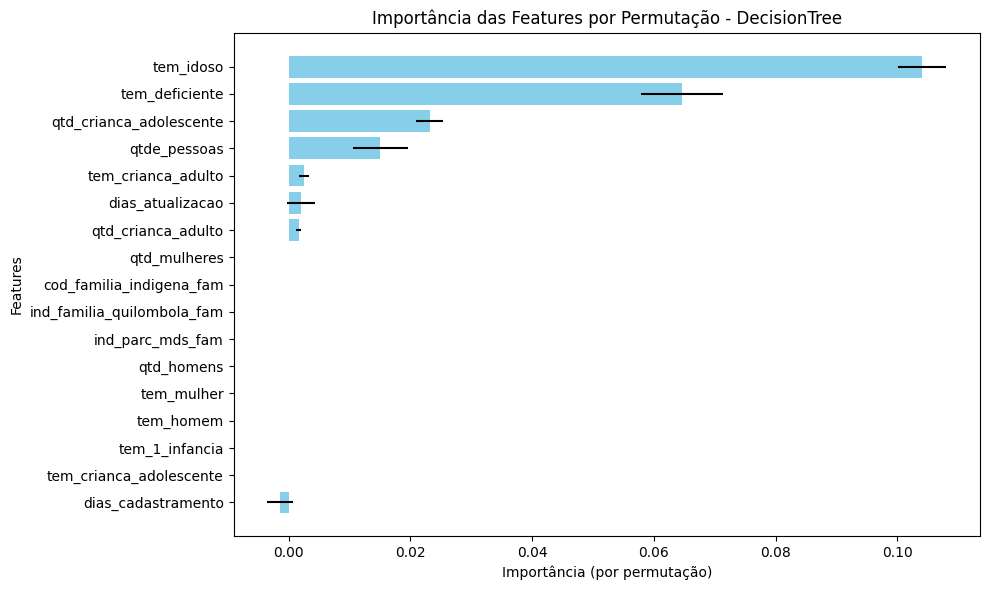

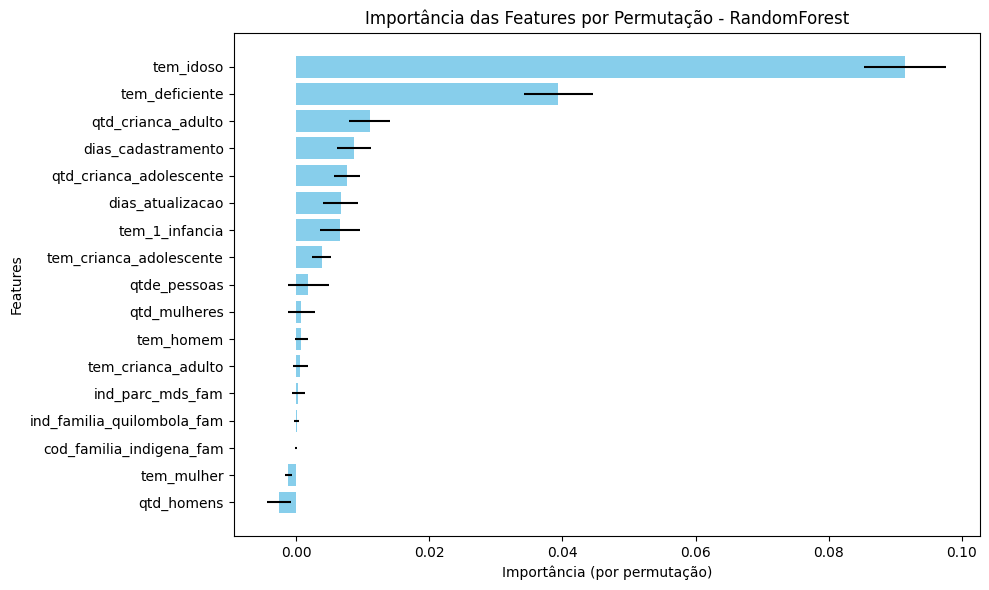

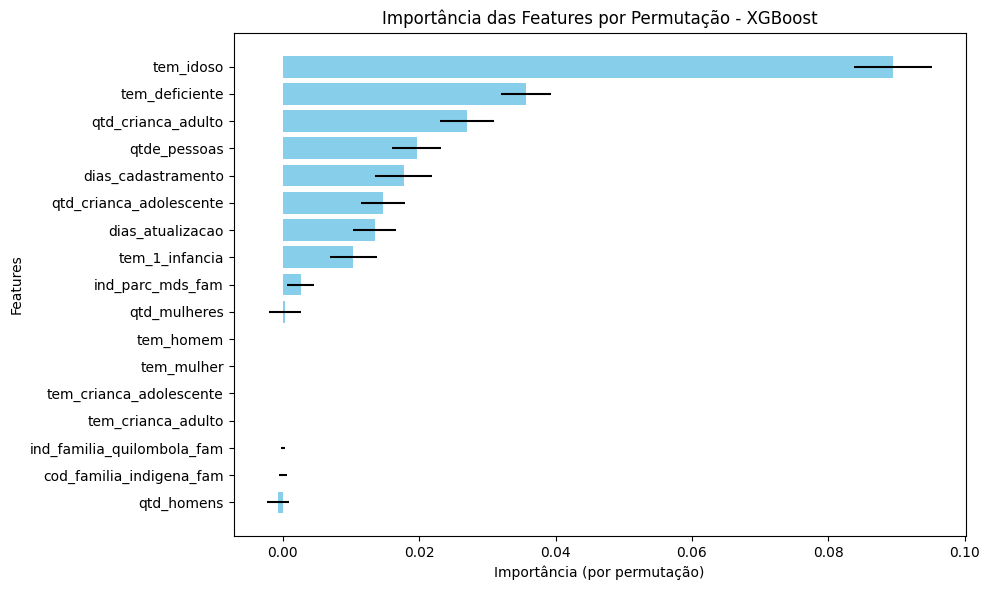

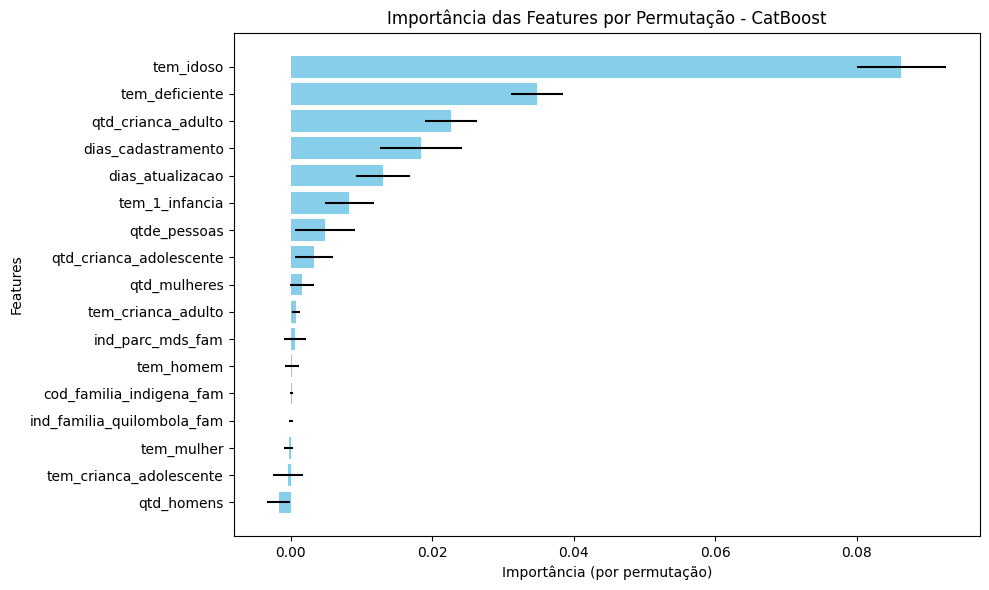

In [28]:
# Importância das features para cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name}")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

In [29]:
# Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:10]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name}:")
    print(top_features_df)


5 Features mais importantes para o modelo DecisionTree:
                      Feature  Importância
0                   tem_idoso      0.10405
1              tem_deficiente      0.06465
2     qtd_crianca_adolescente      0.02315
3                qtde_pessoas      0.01505
4          tem_crianca_adulto      0.00255
5            dias_atualizacao      0.00205
6          qtd_crianca_adulto      0.00165
7                qtd_mulheres      0.00000
8    cod_familia_indigena_fam      0.00000
9  ind_familia_quilombola_fam      0.00000

5 Features mais importantes para o modelo RandomForest:
                   Feature  Importância
0                tem_idoso      0.09145
1           tem_deficiente      0.03940
2       qtd_crianca_adulto      0.01105
3       dias_cadastramento      0.00870
4  qtd_crianca_adolescente      0.00765
5         dias_atualizacao      0.00670
6           tem_1_infancia      0.00660
7  tem_crianca_adolescente      0.00385
8             qtde_pessoas      0.00185
9            

# Avaliando o balanceamento das classes

In [30]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [31]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.6486
1.0    0.2290
2.0    0.1224
Name: proportion, dtype: float64


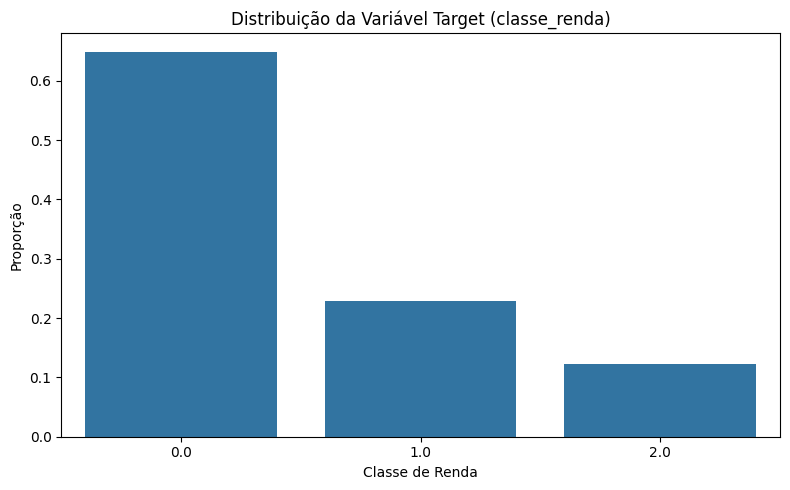

In [32]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    6486
1.0    2290
2.0    1224
Name: count, dtype: int64


## Balanceando as classes

In [34]:
pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [36]:
df_familia_pessoas_final.classe_renda.value_counts()

,count
classe_renda,
0.0,6486
1.0,2290
2.0,1224


In [37]:
y.value_counts()

,count
classe_renda,
0.0,6486
1.0,2290
2.0,1224


In [38]:
# Suponha que 'y' seja sua variável alvo e '0.0' seja a classe majoritária
n_samples_majority = y.value_counts()[0.0]

# Oversampling da classe '1.0' para 30% da classe majoritária
n_samples_1 = int(0.9 * n_samples_majority)

# Oversampling da classe '2.0' para 40% da classe majoritária
n_samples_2 = int(0.9 * n_samples_majority)

# Undersampling da classe '0.0' para 70% do tamanho original
n_samples_0 = int(1.0 * n_samples_majority)

over = SMOTE(sampling_strategy={1.0: n_samples_1, 2.0: n_samples_2})
under = RandomUnderSampler(sampling_strategy={0.0: n_samples_0})

In [39]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [40]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [41]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    6486
1.0    5837
2.0    5837
Name: count, dtype: int64


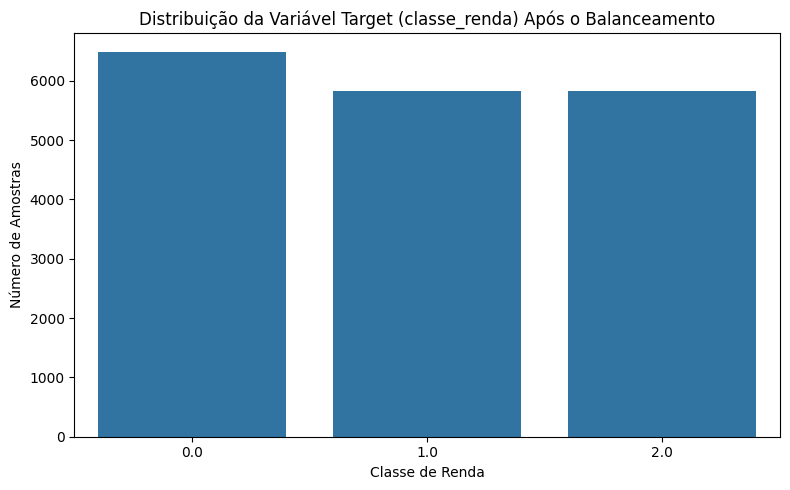

In [42]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Refazendo as análises dos modelos após balanceamento das classes

In [43]:
X_balanced.head()

,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,qtd_mulheres,qtd_homens,qtd_crianca_adolescente,qtd_crianca_adulto,tem_mulher,tem_homem,tem_1_infancia,tem_crianca_adolescente,tem_crianca_adulto,tem_idoso,tem_deficiente,ind_parc_mds_fam
2010,4517.0,677,2.0,2.0,3,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
302,2020.0,531,2.0,2.0,2,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1760,2853.0,749,2.0,2.0,2,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1575,2771.0,104,2.0,2.0,4,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0
8240,1630.0,108,2.0,2.0,4,3.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0


In [44]:
print(X_balanced.shape)
print(y_balanced.shape)

(18160, 17)
(18160,)


In [45]:
print(y_balanced.shape)
print(y.shape)  # Verifique se y é igual a y_balanced

(18160,)
(10000,)


In [46]:
# Dividir os dados em treino e teste após balanceamento
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [47]:
# Definir os modelos e os parâmetros
models_balanced = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}



In [48]:
# Parte 3: Criar um dicionário para armazenar os melhores modelos
best_models_balanced = {}

for model_name, model_info in models_balanced.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV usando as features e classes balanceadas
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_balanced_train, y_balanced_train)  # Usando dados balanceados

    # Armazenar o melhor modelo
    best_models_balanced[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name} (usando dados balanceados): {grid_search.best_params_}")



Melhores hiperparâmetros para DecisionTree (usando dados balanceados): {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest (usando dados balanceados): {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Melhores hiperparâmetros para XGBoost (usando dados balanceados): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost (usando dados balanceados): {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


In [49]:
# Parte 4: Avaliar todos os modelos usando dados balanceados
from sklearn.metrics import f1_score, accuracy_score
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usando dados de teste balanceados

    # Calcular F1 Score
    f1 = f1_score(y_balanced_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_balanced_test, y_pred)

    # Exibir os resultados
    print(f"Modelo (usando dados balanceados): {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo (usando dados balanceados): DecisionTree
  F1 Score: 0.73
  Acurácia: 0.74
Modelo (usando dados balanceados): RandomForest
  F1 Score: 0.79
  Acurácia: 0.80
Modelo (usando dados balanceados): XGBoost
  F1 Score: 0.81
  Acurácia: 0.81
Modelo (usando dados balanceados): CatBoost
  F1 Score: 0.79
  Acurácia: 0.79


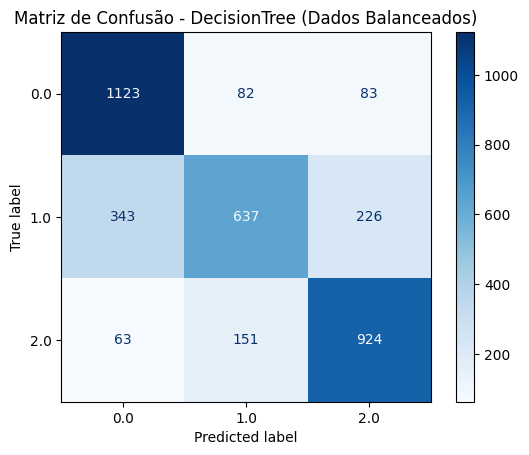

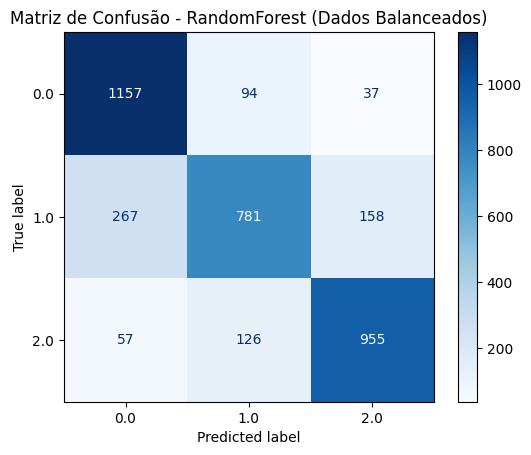

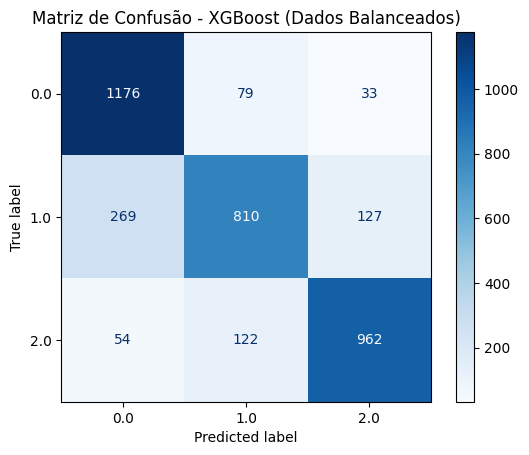

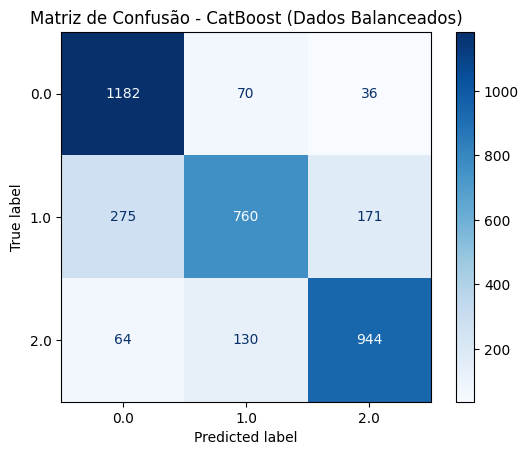

In [50]:
# Parte 5: Gerar matriz de confusão para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usar os dados de teste balanceados

    # Gerar a matriz de confusão
    ConfusionMatrixDisplay.from_estimator(model, X_balanced_test, y_balanced_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name} (Dados Balanceados)')
    plt.show()

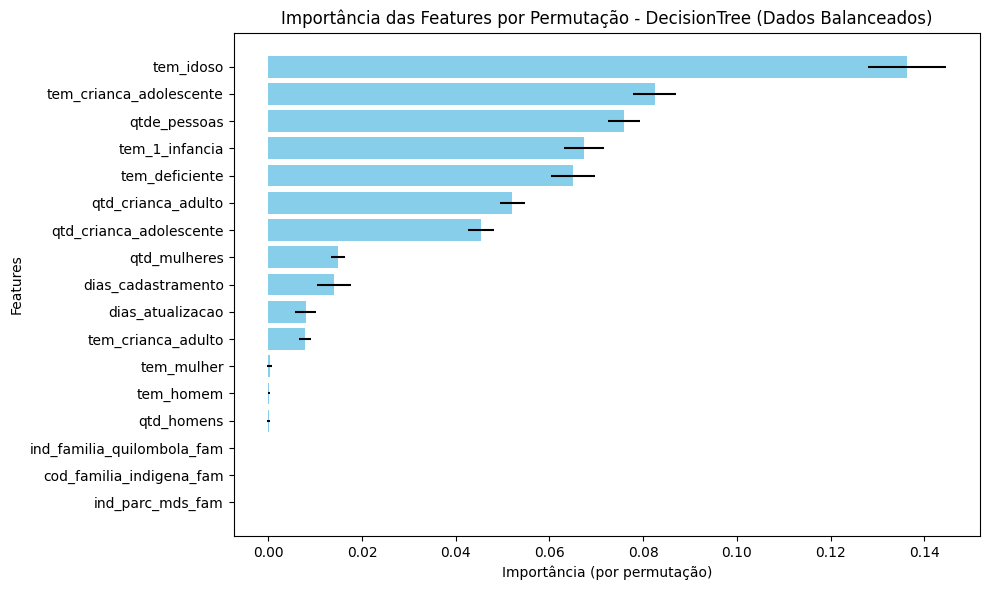

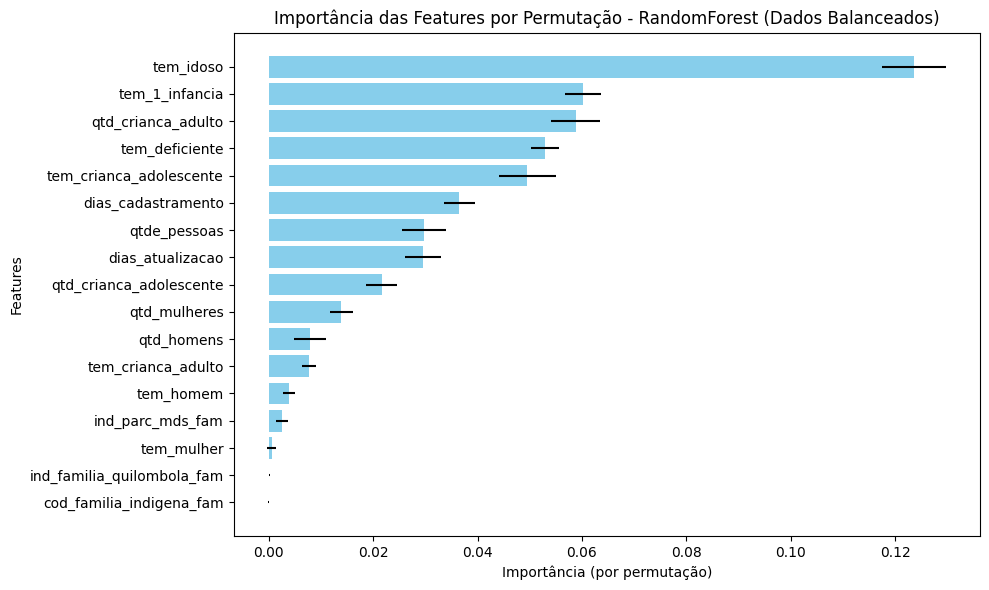

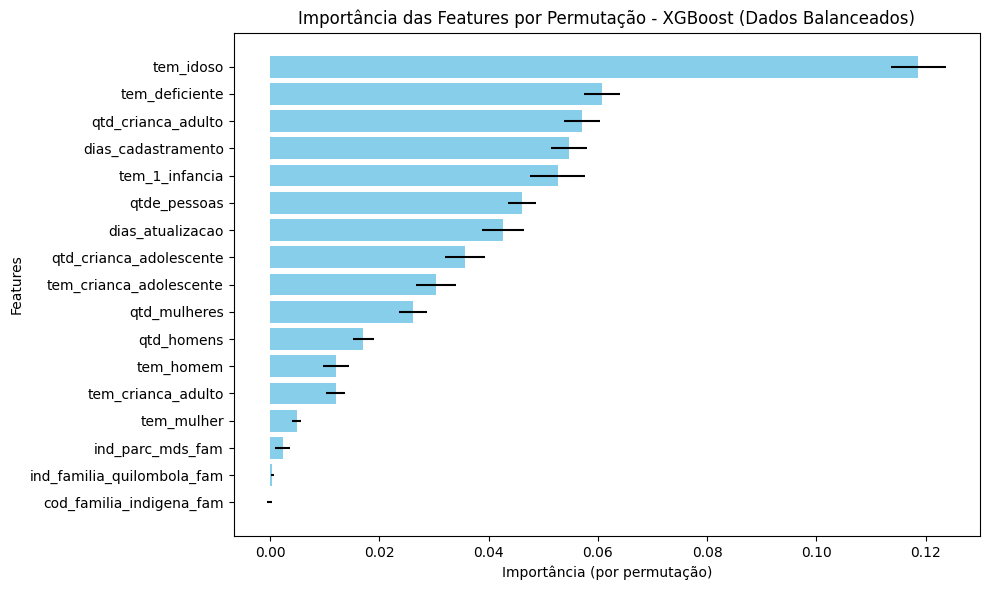

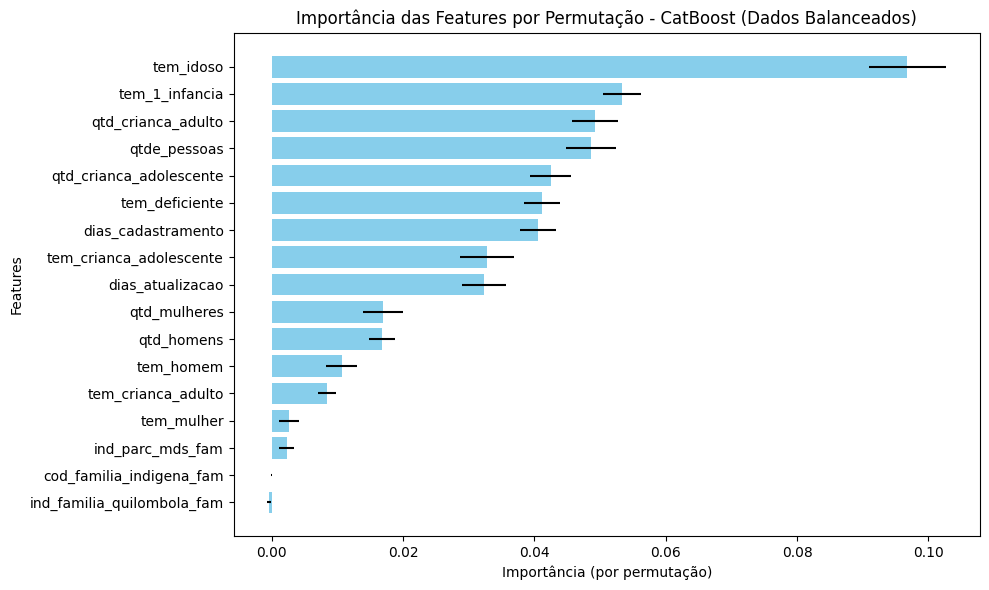

In [51]:
# Parte 6: Importância das features para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name} (Dados Balanceados)")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_balanced_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()



In [52]:
# Parte 7: Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:10]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name} (Dados Balanceados):")
    print(top_features_df)



5 Features mais importantes para o modelo DecisionTree (Dados Balanceados):
                   Feature  Importância
0                tem_idoso     0.136316
1  tem_crianca_adolescente     0.082406
2             qtde_pessoas     0.075909
3           tem_1_infancia     0.067263
4           tem_deficiente     0.065033
5       qtd_crianca_adulto     0.052093
6  qtd_crianca_adolescente     0.045402
7             qtd_mulheres     0.014895
8       dias_cadastramento     0.014014
9         dias_atualizacao     0.007985

5 Features mais importantes para o modelo RandomForest (Dados Balanceados):
                   Feature  Importância
0                tem_idoso     0.123623
1           tem_1_infancia     0.060215
2       qtd_crianca_adulto     0.058783
3           tem_deficiente     0.052919
4  tem_crianca_adolescente     0.049559
5       dias_cadastramento     0.036536
6             qtde_pessoas     0.029681
7         dias_atualizacao     0.029570
8  qtd_crianca_adolescente     0.021641
9     

# Comparando a performance antes e após o balanceamento

In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance

In [54]:
# Lista para armazenar as métricas de desempenho
performance_comparison = []

# Avaliar modelos antes do balanceamento
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score e Acurácia
    f1_before = f1_score(y_test, y_pred, average='macro')
    accuracy_before = accuracy_score(y_test, y_pred)

    # Armazenar os resultados antes do balanceamento
    performance_comparison.append({
        'Modelo': model_name,
        'F1 Score Antes do Balanceamento': f1_before,
        'Acurácia Antes do Balanceamento': accuracy_before,
        'F1 Score Após o Balanceamento': None,  # Inicializa como None
        'Acurácia Após o Balanceamento': None,  # Inicializa como None
    })


In [55]:
# Avaliar modelos após o balanceamento
for model_name, model in best_models_balanced.items():
    y_pred_balanced = model.predict(X_balanced_test)

    # Calcular F1 Score e Acurácia
    f1_balanced = f1_score(y_balanced_test, y_pred_balanced, average='macro')
    accuracy_after = accuracy_score(y_balanced_test, y_pred_balanced)

    # Adicionar os resultados após o balanceamento ao mesmo dicionário
    for entry in performance_comparison:
        if entry['Modelo'] == model_name:
            entry['F1 Score Após o Balanceamento'] = f1_balanced
            entry['Acurácia Após o Balanceamento'] = accuracy_after



In [56]:
# Criar DataFrame para as métricas de desempenho
performance_df = pd.DataFrame(performance_comparison)

# Exibir o DataFrame de desempenho
performance_df.head(10)


,Modelo,F1 Score Antes do Balanceamento,Acurácia Antes do Balanceamento,F1 Score Após o Balanceamento,Acurácia Após o Balanceamento
0,DecisionTree,0.601048,0.7335,0.730133,0.738987
1,RandomForest,0.621669,0.7440,0.792740,0.796531
2,XGBoost,0.617257,0.7390,0.808654,0.811674
3,CatBoost,0.619117,0.7400,0.789383,0.794604


In [57]:
# Obter as 5 features mais importantes antes do balanceamento
top_features_before = {}

for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    top_indices = indices[:10]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    top_features_before[model_name] = top_features_df



In [58]:
# Obter as 5 features mais importantes após o balanceamento
top_features_after = {}

for model_name, model in best_models_balanced.items():
    # Calcular a importância das features usando o conjunto de dados balanceado
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair os valores de importância
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Selecionar os 5 índices mais importantes
    top_indices = indices[:10]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Criar DataFrame para armazenar as features e suas importâncias
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Armazenar o DataFrame na lista de modelos
    top_features_after[model_name] = top_features_df




In [59]:
# Criar DataFrame para as features mais importantes antes e após o balanceamento
top_features_before_df = pd.concat(top_features_before, names=['Modelo', 'Índice']).reset_index()
top_features_after_df = pd.concat(top_features_after, names=['Modelo', 'Índice']).reset_index()

In [60]:
top_features_before_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,tem_idoso,0.10405
1,DecisionTree,1,tem_deficiente,0.06465
2,DecisionTree,2,qtd_crianca_adolescente,0.02315
3,DecisionTree,3,qtde_pessoas,0.01505
4,DecisionTree,4,tem_crianca_adulto,0.00255
5,DecisionTree,5,dias_atualizacao,0.00205
6,DecisionTree,6,qtd_crianca_adulto,0.00165
7,DecisionTree,7,qtd_mulheres,0.00000
8,DecisionTree,8,cod_familia_indigena_fam,0.00000
9,DecisionTree,9,ind_familia_quilombola_fam,0.00000


In [61]:
top_features_after_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,tem_idoso,0.136316
1,DecisionTree,1,tem_crianca_adolescente,0.082406
2,DecisionTree,2,qtde_pessoas,0.075909
3,DecisionTree,3,tem_1_infancia,0.067263
4,DecisionTree,4,tem_deficiente,0.065033
5,DecisionTree,5,qtd_crianca_adulto,0.052093
6,DecisionTree,6,qtd_crianca_adolescente,0.045402
7,DecisionTree,7,qtd_mulheres,0.014895
8,DecisionTree,8,dias_cadastramento,0.014014
9,DecisionTree,9,dias_atualizacao,0.007985


In [62]:
# Combinar em um único dataframe

# Criar um DataFrame vazio para armazenar o resultado
combined_df = pd.DataFrame()

# Iterar sobre os modelos únicos
for modelo in top_features_before_df['Modelo'].unique():
    # Obter as 5 features mais importantes antes e após o balanceamento
    antes = top_features_before_df[top_features_before_df['Modelo'] == modelo].reset_index(drop=True)
    depois = top_features_after_df[top_features_after_df['Modelo'] == modelo].reset_index(drop=True)

    # Adicionar as features antes e depois ao DataFrame combinado
    for i in range(5):  # Para as 5 features mais importantes
        combined_df = pd.concat([combined_df, pd.DataFrame({
            'Modelo': modelo,
            'Feature Antes': antes['Feature'][i],
            'Importância Antes': antes['Importância'][i],
            'Feature Após': depois['Feature'][i],
            'Importância Após': depois['Importância'][i]
        }, index=[0])], ignore_index=True)


In [63]:
 combined_df.head(20)

,Modelo,Feature Antes,Importância Antes,Feature Após,Importância Após
0,DecisionTree,tem_idoso,0.10405,tem_idoso,0.136316
1,DecisionTree,tem_deficiente,0.06465,tem_crianca_adolescente,0.082406
2,DecisionTree,qtd_crianca_adolescente,0.02315,qtde_pessoas,0.075909
3,DecisionTree,qtde_pessoas,0.01505,tem_1_infancia,0.067263
4,DecisionTree,tem_crianca_adulto,0.00255,tem_deficiente,0.065033
5,RandomForest,tem_idoso,0.09145,tem_idoso,0.123623
6,RandomForest,tem_deficiente,0.03940,tem_1_infancia,0.060215
7,RandomForest,qtd_crianca_adulto,0.01105,qtd_crianca_adulto,0.058783
8,RandomForest,dias_cadastramento,0.00870,tem_deficiente,0.052919
9,RandomForest,qtd_crianca_adolescente,0.00765,tem_crianca_adolescente,0.049559
